In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class LinearRegression:
    def __init__(self):
        self.coefs = None
        self.epochs_cost = []
    
    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([X, ones], axis=1)
        
        try:
            y_pred=X@self.coefs
            
            return y_pred
        
        except:
            print('First fit your data and then predict the values')
            
    def cost(self, Yhat, Y):
        return ((Y - Yhat)**2).mean() / 2.0
    
    def fit(self, X, Y, learning_rate=0.01, max_epochs=100):
            # concat ones
            ones = np.ones((X.shape[0], 1))
            X = np.concatenate([X, ones], axis=1)
        
            # input dimension
            lines, cols = X.shape
            
            # random weights
            W = np.random.rand(cols, 1)
            
            for i in range(max_epochs):                
                # predict
                Yhat = X @ W
                
                # save cost
                self.epochs_cost.append(self.cost(Yhat, Y))
                
                #erro
                E = Y - Yhat
                
                # adjust
                Adj =(E * X).mean(axis=0).reshape(-1, 1)
                
                # adjust
                W = W + (learning_rate * Adj)
            
            self.coefs = W
            
            return W
    
    def plot_cost(self):
        if len(self.epochs_cost) == 0:
            print('First fit your data and then predict the values')
            return
        
            
        plt.title('cost v/s iteration')
        plt.plot(self.epochs_cost)
        plt.xlabel('no. of iterations')
        plt.ylabel('cost')
        plt.show()

    def linear_regression(self, X, Y, learning_rate=0.01, max_epochs=100, tolerance =0.01):
        
        # concat ones
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([X, ones], axis=1)
    
        # input dimension
        lines, cols = X.shape
        
        # random weights
        W = np.random.rand(cols, 1)
        
        epoch = 0
        cost = tolerance + 1
        while (epoch < max_epochs and cost > tolerance):   
            Yhat = X @ W
            #erro
            E = Y - Yhat
            
            # adjust
            Adj = (E * X).mean(axis=0).reshape(-1, 1)
            
            # adjust
            W = W + (learning_rate * Adj)
            epoch += 1
            cos = self.cost(Yhat, Y)
            
        
        return W
    


In [10]:
# random normal
np.random.seed(1)

x=np.random.randn(1000,1)  
w=np.random.randn()
b=np.random.randn()

y=x*w+b +(np.random.randn(1000,1)*0.09)  #this last term of np.random.randn() is to add noise in data

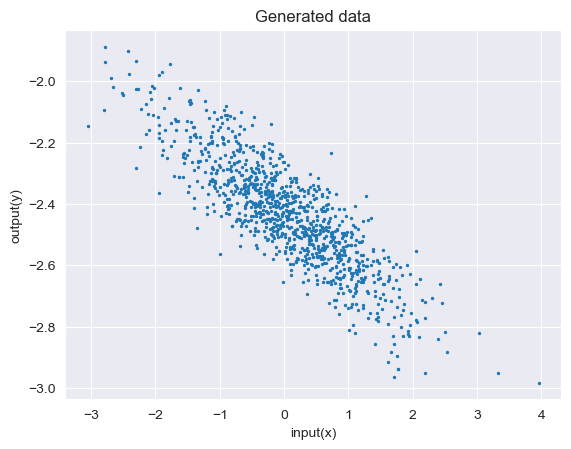

w: -0.15323616176709168
 b: -2.432508512647113


In [11]:
# plt.title('Generated data')
plt.title('Generated data')
plt.xlabel('input(x)')
plt.ylabel('output(y)')
plt.scatter(x=x[:,0],y=y[:,0], s=2)
plt.grid(True)
plt.show()
print(f"w: {w}\n b: {b}")

In [12]:
model = LinearRegression()
model.fit(x, y, 0.1, 100)

array([[-0.15541146],
       [-2.42959335]])

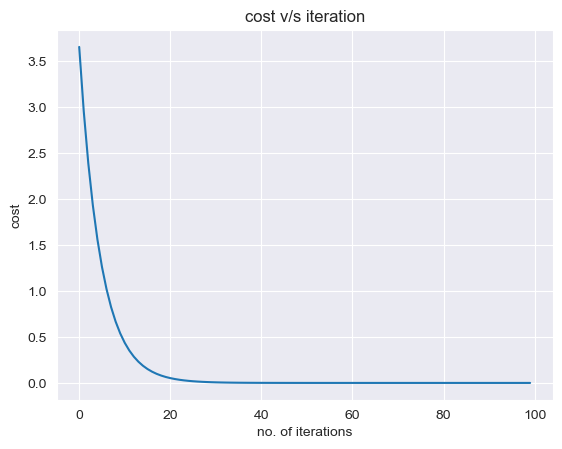

In [13]:
model.plot_cost()

In [14]:
# Predict
X = np.array([1]).reshape(1, 1)
model.predict(X)

array([[-2.5850048]])